#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [3]:
X= torch.rand(4,3)
Y= torch.rand(4,3)
print(torch.cat([X, Y], dim = 0)) #행 병합
print(torch.cat([X, Y], dim = 1)) #열 병합 

tensor([[0.5603, 0.9126, 0.6670],
        [0.5682, 0.6533, 0.5428],
        [0.6283, 0.3877, 0.8200],
        [0.8016, 0.1727, 0.0188],
        [0.8632, 0.1018, 0.1683],
        [0.1493, 0.5435, 0.2468],
        [0.7631, 0.7736, 0.9900],
        [0.6662, 0.3023, 0.6581]])
tensor([[0.5603, 0.9126, 0.6670, 0.8632, 0.1018, 0.1683],
        [0.5682, 0.6533, 0.5428, 0.1493, 0.5435, 0.2468],
        [0.6283, 0.3877, 0.8200, 0.7631, 0.7736, 0.9900],
        [0.8016, 0.1727, 0.0188, 0.6662, 0.3023, 0.6581]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [4]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 553 kB/s 
     |████████████████████████████████| 9.9 MB 28.6 MB/s 
     |████████████████████████████████| 11.2 MB 38.5 MB/s 
     |████████████████████████████████| 61 kB 6.8 MB/s 
     |████████████████████████████████| 15.7 MB 39.3 MB/s 
     |████████████████████████████████| 944 kB 71.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [5]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [31]:
#generating the dataset
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b  #matmul: vector, matrix 간의 곱셈 수행 (broadcast 기능 제공)
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1)) #reshape(-1,1)은 열을 1로 지정되었을 때 남은 차원으로부터 추정하여 계산

true_w = torch.tensor([3, -1.5]) 
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [32]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.0320, -1.0784]) 
label: tensor([7.2148])


In [33]:
#reading the dataset
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [34]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.7552,  1.0727],
        [ 0.0717, -0.2792],
        [-1.1981,  0.7871],
        [ 0.6220, -0.8940],
        [-1.2699,  0.4161],
        [-0.5764, -1.7333],
        [-1.5496, -0.1016],
        [ 0.4426,  0.8827],
        [ 0.2124,  0.0261],
        [ 0.6942,  0.2026],
        [-1.1858,  0.7253],
        [-1.2195, -0.3884],
        [-0.6970,  0.1165],
        [-0.1705, -0.1005],
        [ 1.0688, -0.2386],
        [-0.9221, -0.8516],
        [ 0.7627, -1.2196],
        [-0.3606, -0.7517],
        [-0.8131,  1.7458],
        [ 0.8620,  0.1685]]) 
 tensor([[1.6292],
        [6.1318],
        [0.7162],
        [8.7283],
        [1.0661],
        [6.3816],
        [1.0033],
        [5.5128],
        [6.1065],
        [7.2783],
        [0.8536],
        [2.3994],
        [3.2314],
        [5.1602],
        [9.0626],
        [4.0117],
        [9.6023],
        [5.5470],
        [0.4187],
        [7.8306]])


In [35]:
#initializing model parameters
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True) #requires_grad : 
b = torch.zeros(1, requires_grad=True)

  #after initializing the model params, need to update until they sufficiently fit the data #매개변수는 해당 매개변수에 대한 손실 함수의 변화도에 따라 조정됨
  #each update requires taking the gradient(기울기) of our loss function w/ respect to params
  #given gradient, update params to the direction that reduce the loss

In [36]:
#defining the model
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w) + b #Xw: vector, b: scalar / 'b' added to each component of vector

In [37]:
#defining the loss function
def squared_loss(y_hat, y):  
    """Squared loss."""  
    return (y_hat - y.reshape(y_hat.shape)) **2 / 2 #transform the y into y_hat 
                                                    #1/2 : 표기상의 편리함, 미분하면 사라짐 

In [38]:
#defining the optimization algorithm
def sgd(params, lr, batch_size): #lr: learning rate(update step을 결정함) 
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
      for param in params:
        param -= lr * param.grad / batch_size #normalize step size by batch size so that magnitude of a typical step size not depend on the batch size
        param.grad.zero_() #grad.zero_() : ???

In [39]:
#training #모델 훈련: 예측 -> 손실 계산 -> 역전파를 통한 기울기 계산 -> 파라미터 갱신 
lr = 0.04
num_epochs = 4
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) #Minibatch loss in 'X' and 'y'
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward() #backward: ??? 
        sgd([w, b], lr, batch_size) #update params using gradient 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.005509
epoch 2, loss 0.000049
epoch 3, loss 0.000048
epoch 4, loss 0.000048


In [40]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-1.7643e-05,  6.2692e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([-0.0007], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [44]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

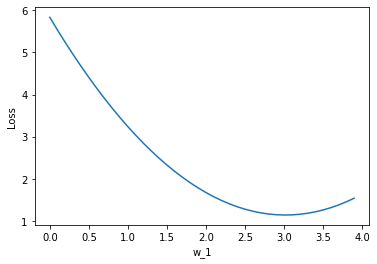

In [45]:
import numpy as np
import matplotlib.pyplot as plt


w_list = []
mse_list = []

for w in  np.arange(0.0, true_w[0] +1 , 0.1):
  l_sum = 0 
  for x ,y in zip(features[:, 0], labels):
      l_sum += loss(np.dot(x,w) + true_b , y)
  w_list.append(w)
  mse_list.append(l_sum / features.shape[0])

plt.plot(w_list, mse_list)
plt.ylabel("Loss")
plt.xlabel('w_1')
plt.show()

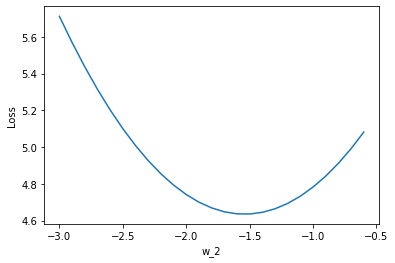

In [46]:
import numpy as np
import matplotlib.pyplot as plt

w_list = []
mse_list = []

for w in  np.arange(-3, true_w[1] +1 , 0.1):
  l_sum = 0 
  for x ,y in zip(features[:, 1], labels):
      l_sum += loss(np.dot(x,w) + true_b , y)
  w_list.append(w)
  mse_list.append(l_sum / features.shape[0])

plt.plot(w_list, mse_list)
plt.ylabel("Loss")
plt.xlabel('w_2')
plt.show()

concise implementation of linear regression 
- api 사용해보기

In [18]:
#generating the dataset
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [19]:
#reading the dataset
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [20]:
next(iter(data_iter))

[tensor([[-0.7702, -0.0108],
         [ 0.5159,  1.3444],
         [-1.1775, -3.4477],
         [-0.8049,  0.5451],
         [-0.6068,  0.5946],
         [-0.5882,  1.4103],
         [ 0.3248,  1.8111],
         [-1.6725, -2.4008],
         [-2.0203, -0.0309],
         [-1.2042,  0.7565],
         [-0.5701,  0.7037],
         [ 2.3188, -0.1428],
         [ 0.0271,  0.6961],
         [ 1.5930,  1.2730],
         [-0.0125, -0.1043],
         [-1.0532, -1.0277],
         [-0.0316,  0.7467],
         [ 1.0390, -0.0646],
         [-1.1615,  0.6047],
         [ 2.0512, -0.0137]]), tensor([[ 3.1994],
         [ 5.0379],
         [ 7.1352],
         [ 2.2785],
         [ 2.7870],
         [ 1.6075],
         [ 3.7538],
         [ 4.0745],
         [-0.5095],
         [ 0.7477],
         [ 2.7432],
         [12.6588],
         [ 4.5495],
         [ 8.3705],
         [ 5.6331],
         [ 3.8799],
         [ 4.2826],
         [ 8.7123],
         [ 1.1140],
         [11.6654]])]

In [21]:
#defining the model
from torch import nn #nn: neural networks

net = nn.Sequential(nn.Linear(2,1)) #Linear 안에 full-connected layer #2: input feature dim #1:output feature dim

In [22]:
#initializing model parameters(weights, bias)
net[0].weight.data.normal_(0, 0.01) 
net[0].bias.data.fill_(0)

  #net[0] : first layer in the network 
  #.weight.data/.bias.data: access params  
  #.normal_/.fill_ :overwrite params

tensor([0.])

In [23]:
#defining the loss function
loss = nn.MSELoss() #mean squared error

In [25]:
#defining the optimization algorithm
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

#SGD: parameters to optimize over

In [26]:
#training 
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) #net(X)로 예측  #l로 loss 계산(forward propagation)
        trainer.zero_grad()
        l.backward() #back propagation을 이용하여 gradient 계산
        trainer.step() #model parameter update
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')


    #api 장점: 매개변수 각각 지정할 필요 x, loss function 정의 필요 x, minibatch stochastic gradient descent 시행 필요 x

epoch 1, loss 0.000254
epoch 2, loss 0.000097
epoch 3, loss 0.000097


In [27]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

#access the params: access the first layer(net[0]) -> access layer's weights, loss(.weight.data / .bias.data)

error in estimating w: tensor([-0.0006,  0.0002])
error in estimating b: tensor([-0.0003])


In [ ]:
#궁금한 점 1: zero_grad , grad_zero 
#2: forward propagation, backward propagation
#3: DL은 오차가 가장 적은 Parameter 찾는 것이 주된 목표인것인지?? 
#4: layer, Minibatch에 대한 개념